In [1]:
%reload_ext cairo_jupyter

ImageSurface


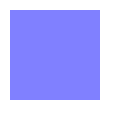

SVG to buffer


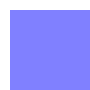

continue drawing...
Display final surface


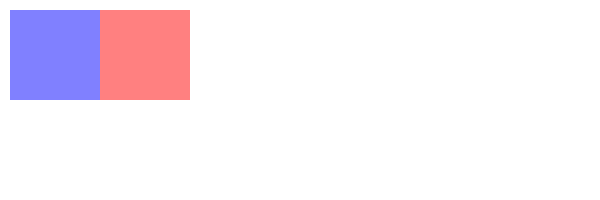

(10.0, 10.0, 180.0, 90.0)

In [35]:
import cairo

from io import BytesIO
from IPython.display import SVG, display

from display_xml import XML


class BufferedCanvas:
    """
    BufferedCanvas is backed by a RecordingSurface
    to keep track of the current drawing state and
    allow saving of the intermediate state to
    other surfaces.
    """
    def __init__(self):
        self.surface = cairo.RecordingSurface(cairo.CONTENT_COLOR_ALPHA, 
                                              #None
                                              (0, 0, 600, 200)
                                             )
    
    def save_svg(self, f, dimensions=None):
        if dimensions is None:
            extents = self.surface.ink_extents()
            dimensions = extents[2], extents[3]
        
        surface = cairo.SVGSurface(svgio, *dimensions)
        
        # Draw self.surface onto surface
        cr = cairo.Context(surface)
        cr.set_source_surface(self.surface)
        cr.paint()
        del cr

        surface.finish()
        return f
    
    def save_png(self, f, dimensions=None):
        surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 128, 128)
        
        # Draw self.surface onto surface
        cr = cairo.Context(surface)
        cr.set_source_surface(self.surface)
        cr.paint(surface)
        del cr
        
        surface.write_to_png(f)
    
class ShoebotRunner:
    def run_once(self, code):
        pass

canvas = BufferedCanvas()
ctx = cairo.Context(canvas.surface)
ctx.set_source_rgb(.5, .5, 1.)
ctx.rectangle(10, 10, 90, 90)
ctx.fill()

# intermediate ImageSurface 1
print("ImageSurface")
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 128, 128)
_ctx = cairo.Context(surface)
_ctx.set_source_surface(canvas.surface)
_ctx.paint()
display(surface)

# intermediate SVGSurface to buffer
print("SVG to buffer")
with BytesIO() as svgio:
    canvas.save_svg(svgio)
    display(SVG(data=svgio.getvalue()))
    display(XML(svgio.getvalue()))

# continue drawing
print("continue drawing...")
ctx.set_source_rgb(1., .5, .5)
ctx.rectangle(100, 10, 90, 90)
ctx.fill()

del ctx

print("Display final surface")
display(canvas.surface)

canvas.surface.ink_extents()